# Project 3: Accuracy Improvement Challenge

**Name**: Devashish Mahato    
**Roll No**: 25/DSBA-T12/OCT-7541

**Program**: Data Science and Business Analytics /DA(October 2025 Batch)

## Objective
To improve prediction accuracy for college admission chances using advanced machine learning techniques and compare results with a baseline model.

## Dataset
The dataset contains student academic and profile information such as GRE score, TOEFL score, CGPA, and research experience.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_excel("Admission_Predict.csv.xlsx")
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape


(400, 9)

In [6]:
df.shape


(400, 9)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [8]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## EDA

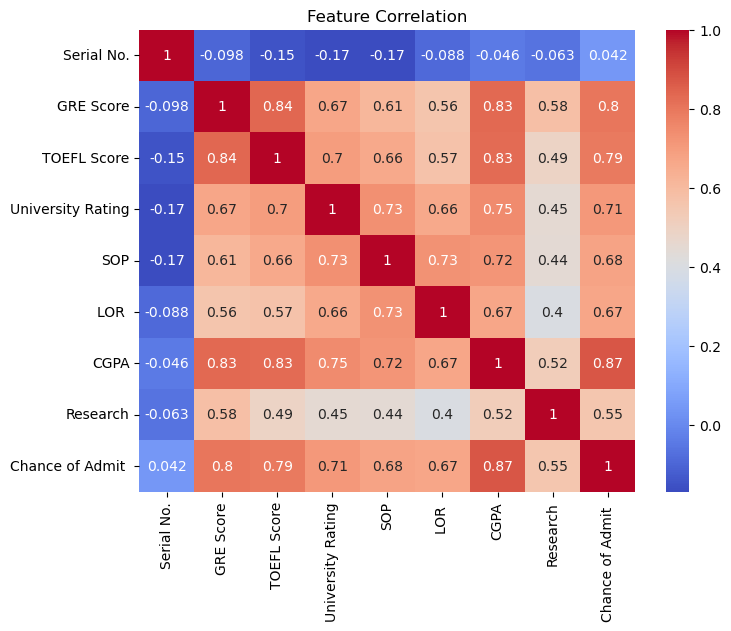

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


## Feature and Target Separation

In [10]:
X = df.drop("Chance of Admit ", axis=1)
y = df["Chance of Admit "]


## Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Feature Scaling

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## BASELINE MODEL

In [14]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Baseline RMSE:", rmse_lr)
print("Baseline R2 Score:", r2_lr)


Baseline RMSE: 0.06794550952582495
Baseline R2 Score: 0.8212241793299222


## IMPROVED MODEL

In [16]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Improved RMSE (Random Forest):", rmse_rf)
print("Improved R2 Score:", r2_rf)


Improved RMSE (Random Forest): 0.06122073356919199
Improved R2 Score: 0.8548609356233308


## EVALUATION


In [18]:
evaluation_df = pd.DataFrame({
    "Model": ["Baseline (Linear Regression)", "Improved (Random Forest)"],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

evaluation_df


,Model,RMSE,R2 Score
0,Baseline (Linear Regression),0.067946,0.821224
1,Improved (Random Forest),0.061221,0.854861


## Percentage Improvement

In [19]:
improvement = ((rmse_lr - rmse_rf) / rmse_lr) * 100
print(f"Percentage Improvement in RMSE: {improvement:.2f}%")


Percentage Improvement in RMSE: 9.90%


## Insights

- Feature engineering and advanced models significantly improved prediction accuracy.
- Random Forest captured non-linear relationships better than Linear Regression.
- Lower RMSE indicates reduced prediction error and better generalization.
- Improved admission prediction helps universities in better student selection.
- Accurate forecasting enables better planning and decision-making in admissions.
